# Lab 8: Define and Solve an ML Problem of Your Choosing

In [35]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [36]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)
print(df.shape)
df.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

    I am using the 1994 Census dataset.The goal is to predict whether an individual's income exceeds $50,000 per year based on their demographic attributes. (The label is income-binary.) Additionally, I am analyzing data distribution with a focus on comparing individuals from native-US origin vs. non-US native origins and considering race to identify potential biases. Although a detailed fairness metric might not be feasible within the current scope, it's still important to keep this consideration in mind while evaluating the best model. 
    
    This is a supervised learning problem involving classification. Specifically, it is a binary classification problem where the task is to predict one of two possible outcomes: income above or below $50,000. The current features are - Age, Workclass, Education, Education-Num, Marital-Status, Occupation, Relationship, Race, Gender, Capital-Gain, Capital-Loss, Hours-per-week, Native-Country.
    
    Addressing income prediction is crucial for understanding income disparities across different demographic groups. Governments and organizations can leverage such models to analyze income distributions and identify disparities. This information is valuable for developing policies aimed at reducing income inequality and ensuring fair practices and equitable opportunities for various communities.




## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [37]:
print(df.columns)
print(df.info())

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int

In [38]:
# Display the distribution of values in 'race' and 'native-country' columns
print(df['race'].value_counts())
print("\n")
print(df['native-country'].value_counts())
print("\n")

# Create a binary column based on 'native-country'
df['country_group'] = df['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

# Drop the original 'native-country' column
df.drop(columns=['native-country'], inplace=True)

# Display the first 10 rows of the modified DataFrame
df.head(10)

# Optional: Check the distribution of the new 'country_group' column
print("\n")
print(df['country_group'].value_counts())


White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Inuit       311
Other                   271
Name: race, dtype: int64


United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portu

Out of 32,561 rows, 27,816 individuals are White, making it the most represented race in the dataset. The Amer-Indian-Inuit population has the least representation with only 311 individuals. The 'native-country' column has been converted into a binary format: 0 for non-native individuals and 1 for native-US individuals. This simplifies the analysis by focusing on the binary classification of US natives versus non-natives.

In [39]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

mean_ages = df['age'].mean()
mean_hours = df['hours-per-week'].mean()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
income_binary        0
country_group        0
dtype: int64


In [40]:
df['age'].fillna(value=mean_ages, inplace=True)
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

#sum equals 0
np.sum(df['age'].isnull(), axis = 0)
np.sum(df['hours-per-week'].isnull(), axis = 0)

nan_count_updated = np.sum(df.isnull(), axis = 0)
print(nan_count_updated)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
income_binary        0
country_group        0
dtype: int64


In [41]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
#df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
#df['income_binary'].fillna(df['income_binary'].mode()[0], inplace=True)

In [42]:
print(df.columns)
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
df.head(10)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'income_binary',
       'country_group'],
      dtype='object')


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary,country_group,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female
0,39.0,77516,13,2174,0,40.0,<=50K,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,50.0,83311,13,0,0,13.0,<=50K,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,38.0,215646,9,0,0,40.0,<=50K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,53.0,234721,7,0,0,40.0,<=50K,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,28.0,338409,13,0,0,40.0,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
5,37.0,284582,14,0,0,40.0,<=50K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
6,49.0,160187,5,0,0,16.0,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
7,52.0,209642,9,0,0,45.0,>50K,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
8,31.0,45781,14,14084,0,50.0,>50K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
9,42.0,159449,13,5178,0,40.0,>50K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [43]:
df.columns
df.describe

<bound method NDFrame.describe of         age  fnlwgt  education-num  capital-gain  capital-loss  \
0      39.0   77516             13          2174             0   
1      50.0   83311             13             0             0   
2      38.0  215646              9             0             0   
3      53.0  234721              7             0             0   
4      28.0  338409             13             0             0   
...     ...     ...            ...           ...           ...   
32556  27.0  257302             12             0             0   
32557  40.0  154374              9             0             0   
32558  58.0  151910              9             0             0   
32559  22.0  201490              9             0             0   
32560  52.0  287927              9         14084             0   

       hours-per-week income_binary  country_group  workclass_Federal-gov  \
0                40.0         <=50K              1                      0   
1                13

In [10]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [44]:
print(df.describe(include='all'))

                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count   32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
unique           NaN           NaN            NaN           NaN           NaN   
top              NaN           NaN            NaN           NaN           NaN   
freq             NaN           NaN            NaN           NaN           NaN   
mean       38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std        13.613868  1.055500e+05       2.572720   2420.191974    402.960219   
min        17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%        28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%        37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%        48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max        90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

        hours-per-week inco

In [45]:
df.drop(columns='fnlwgt')

,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary,country_group,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female
0,39.0,13,2174,0,40.0,<=50K,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,50.0,13,0,0,13.0,<=50K,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,38.0,9,0,0,40.0,<=50K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,53.0,7,0,0,40.0,<=50K,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,28.0,13,0,0,40.0,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,12,0,0,38.0,<=50K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
32557,40.0,9,0,0,40.0,>50K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
32558,58.0,9,0,0,40.0,<=50K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
32559,22.0,9,0,0,20.0,<=50K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [46]:
df['income_binary'] = df['income_binary'].apply(lambda x: 1 if x == '>50K' else 0)
df['income_binary'].dtype

dtype('int64')

In [47]:
df.info()
df.isnull().sum()
df.describe()
df.head()
print(df['income_binary'].value_counts())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   32561 non-null  float64
 1   fnlwgt                                32561 non-null  int64  
 2   education-num                         32561 non-null  int64  
 3   capital-gain                          32561 non-null  int64  
 4   capital-loss                          32561 non-null  int64  
 5   hours-per-week                        32561 non-null  float64
 6   income_binary                         32561 non-null  int64  
 7   country_group                         32561 non-null  int64  
 8   workclass_Federal-gov                 32561 non-null  uint8  
 9   workclass_Local-gov                   32561 non-null  uint8  
 10  workclass_Never-worked                32561 non-null  uint8  
 11  workclass_Priva

In [48]:
#new features + label set

y = df['income_binary']
X = df.drop(columns = 'income_binary', axis=1)

print("Number of examples: " + str(X.shape[0]))
print ("\n Number of features: " + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 32561

 Number of features: 65
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'country_group', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair'

Once hot-one-encoding is applied, there are 65 features. The column 'fnlwgt' was dropped due to irrelevancy. There wasn't significant missing values in the column, given that this is a large dataset, so I took the mean of the 'age' and 'hours-per-week' column and encoded features, so until now there is no-null counts.

In [49]:
df.isnull().values.any()

False

In [50]:
import pandas as pd
correlation_with_hours = df.corr()['education-num'].filter(like='race')
print(correlation_with_hours)

#print("\n")
#correlation_with_hours1 = df.corr()['education-num'].filter(like='native-country')
#print(correlation_with_hours1)


#df.corr()['education-num']
#df.corr()['income_binary'].filter(like='race')

#correlation = df['education-num'].corr(df['race_Asian-Pac-Islander'])
#print(f"Correlation between 'education-num' and 'native-country_Mexico': {correlation:.2f}")

race_Amer-Indian-Inuit    -0.029345
race_Asian-Pac-Islander    0.062091
race_Black                -0.075272
race_Other                -0.044133
race_White                 0.051353
Name: education-num, dtype: float64


On average, the education level of different racial groups may vary, but the correlations are weak, meaning that there is no strong indicative relationship between race and education based on this dataset, but it seems that individuals from the  White or Asian/Pacific Islander groups tend to have a slighter higher number of education compared with other groups.

Correlation between education level and country group: 0.1012
                    mean  median       std
country_group                             
0               9.317016     9.0  3.683424
1              10.169455    10.0  2.394966


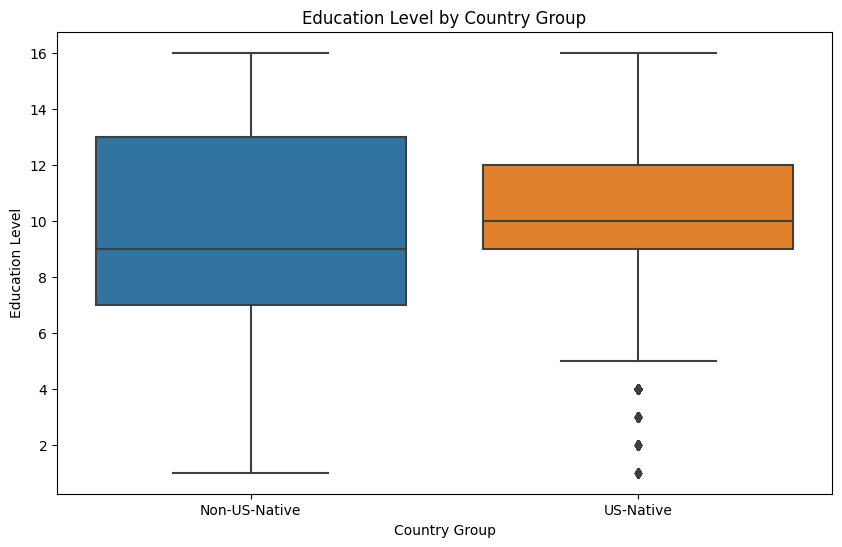

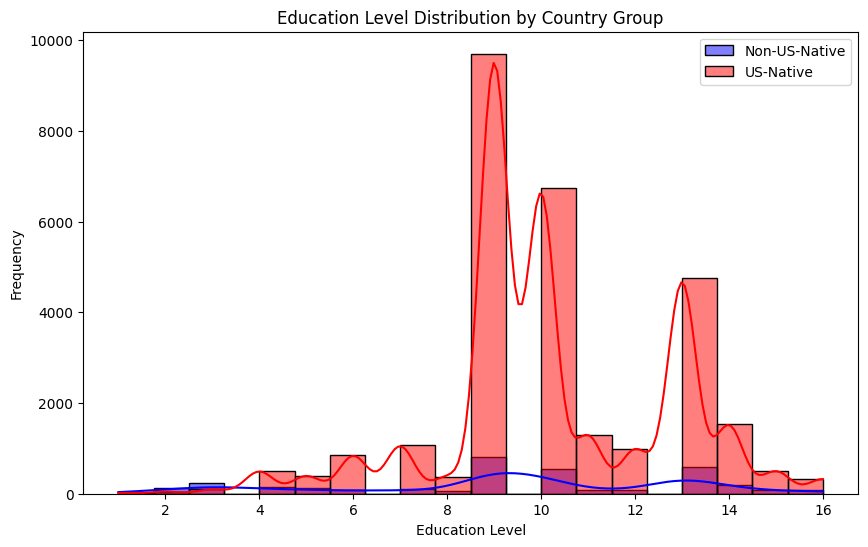

In [51]:

#correlation between 'education-num' and 'country_group'
correlation = df[['education-num', 'country_group']].corr().iloc[0, 1]

print(f"Correlation between education level and country group: {correlation:.4f}")

# Summary statistics for education level by country group
grouped_stats = df.groupby('country_group')['education-num'].agg(['mean', 'median', 'std'])
print(grouped_stats)

# Boxplot to compare education levels by each country group
plt.figure(figsize=(10, 6))
sns.boxplot(x='country_group', y='education-num', data=df)
plt.xticks([0, 1], ['Non-US-Native', 'US-Native'])
plt.title('Education Level by Country Group')
plt.xlabel('Country Group')
plt.ylabel('Education Level')
plt.show()

# histogram for group 0, group 1
plt.figure(figsize=(10, 6))
sns.histplot(df[df['country_group'] == 0]['education-num'], color='blue', label='Non-US-Native', kde=True, bins=20)
sns.histplot(df[df['country_group'] == 1]['education-num'], color='red', label='US-Native', kde=True, bins=20)
plt.title('Education Level Distribution by Country Group')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()



The weak positive correlation indicates a slight tendency for US-natives to have a higher education level compared to non-US-natives, although this relationship is not particularly strong. The data reveal that US-natives, on average, have more years of education (10.17) and exhibit less variability in their education levels compared to non-natives.

The median education level for US-natives is also higher (10.0) compared to non-natives (9.0). Since the median is less influenced by outliers than the mean, it reinforces the observation that US-natives generally have more education. Additionally, the standard deviation for US-natives is lower (2.39) compared to non-US-natives (3.68), indicating that the education levels of US-natives are more consistent.

However, it is important to note that while the average education level is higher for US-natives, the higher variance among non-US-natives—especially within specific groups such as Asian-Pacific Islanders who have higher educational attainment (as indicated in the race-education based correlation data) — may suggest that the claim of "US-natives having more education" can be misleading. This variance can affect model predictions and may lead to inaccurate conclusions about educational backgrounds in specific immigrant groups.

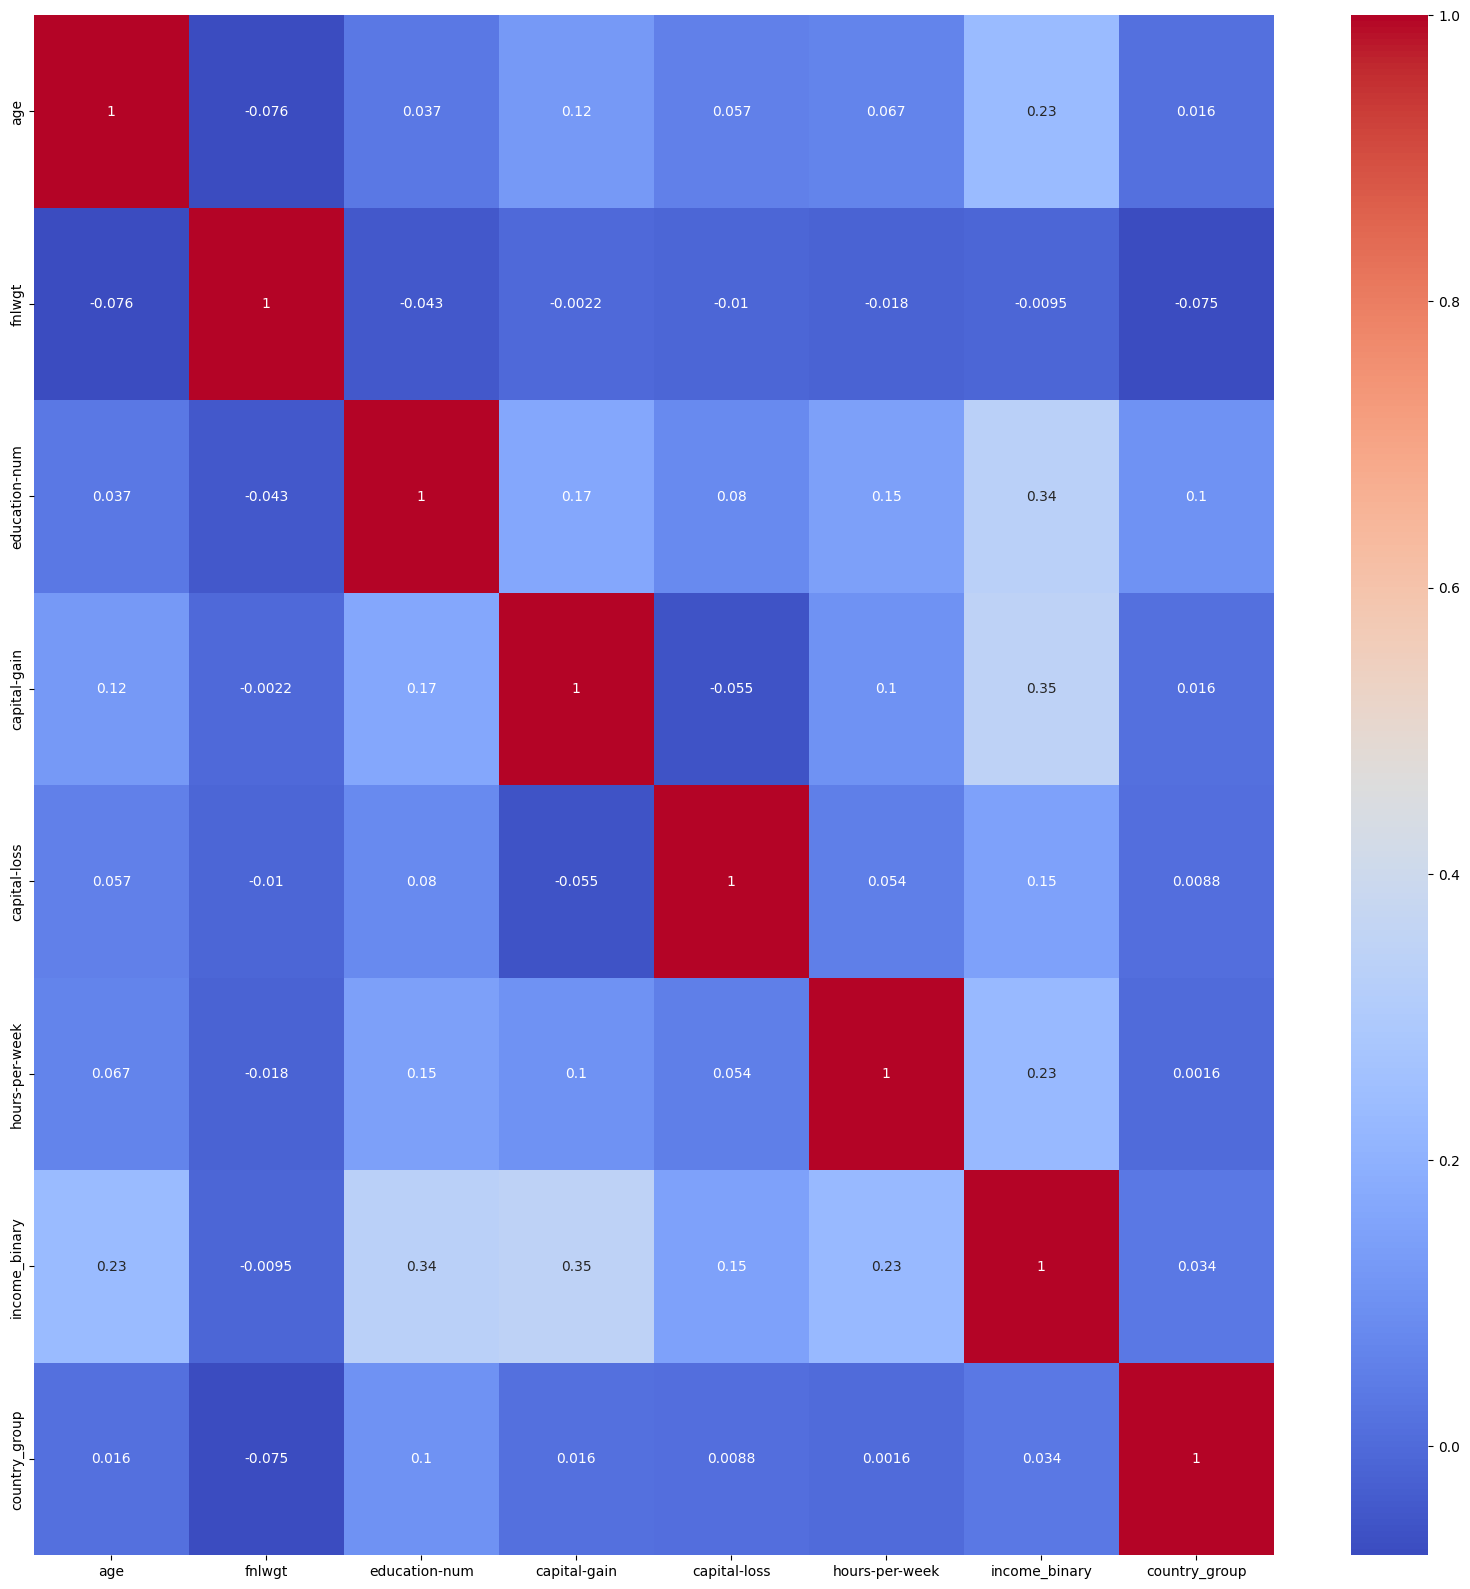

In [52]:
from sklearn.feature_selection import VarianceThreshold

# Assuming df is your DataFrame

# Separate numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
df_reduced = selector.fit_transform(df_numeric)

# Convert the reduced data back to a DataFrame
df_reduced = pd.DataFrame(df_reduced, columns=df_numeric.columns[selector.get_support()])

# Compute correlation matrix
corr_matrix = df_reduced.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [53]:
correlation = df['education-num'].corr(df['education-num'])
#print(f'Correlation between all features and education-num: {correlation}')
correlations = df.corr()['education-num'].sort_values(ascending=False)
print(correlations)

education-num                           1.000000
education_Bachelors                     0.503435
education_Masters                       0.360101
income_binary                           0.335154
occupation_Prof-specialty               0.313431
education_Doctorate                     0.260786
education_Prof-school                   0.256600
occupation_Exec-managerial              0.200923
capital-gain                            0.167089
hours-per-week                          0.146553
education_Assoc-acdm                    0.137319
workclass_State-gov                     0.102589
country_group                           0.101207
workclass_Local-gov                     0.097941
marital-status_Married-civ-spouse       0.086078
capital-loss                            0.079923
relationship_Husband                    0.078848
workclass_Self-emp-inc                  0.077358
education_Assoc-voc                     0.075232
race_Asian-Pac-Islander                 0.062091
occupation_Tech-supp

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

- After inspecting the data, I've kept all the features except for 'fnlwgt' which was dropped due to irrelevancy and 'native-country', as it was redundant after creating the binary classification for US-natives and non-US-natives.
- I imputed missing values for the features - age and hours-per-week - by computing the average and encoded categorical variables through using hot-one-encoding which resulted in subgroups of these features (e.g. race_Asian-Pac-Islander, race_White, race_Black, etc.)
- I plan on evaluating using logistic regression, random forest, gradient-boosting, KNN, and Decision Trees and calculating their accuracy and AUC scores to determine the most optimal model.
- I plan to start off by first splitting the dataset into training and test sets - using a 80/20 split. I am training each model on the training set while also employing cross-validation to mitigate overfitting. I am evaluating each model's performance using metrics such as accuracy, AUC-ROC, and confusion matrix, and comparing them across the model selections to identify the best performing model. To further improve model accuracy, I will perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV, select the most significant features while discarding irrelevant ones, and explore ensemble methods like stacking or voting to combine predictions from multiple models. Additionally, I will conduct error analysis to examine misclassified examples, refine features, and adjust data preparation steps to address any weaknesses identified in the models.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [55]:
# Define your features and target
X = df.drop('income_binary', axis=1)
y = df['income_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# CREATE FUNCTION - train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, auc, cm

# CREATE FUNCTION - display confusion matrix 
def print_confusion_matrix(cm, model_name):
    print(f"Confusion Matrix for {model_name}:")
    print(f"Predicted: Below 50K  Predicted: Above 50K")
    print(f"Actual: Below 50K   {cm[0, 0]}        {cm[0, 1]}")
    print(f"Actual: Above 50K   {cm[1, 0]}        {cm[1, 1]}")
    print("\n")

# Logistic Regression Evaluation
accuracy_log_reg, auc_log_reg, cm_log_reg = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"Logistic Regression:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"AUC-ROC: {auc_log_reg}")
print_confusion_matrix(cm_log_reg, 'Logistic Regression')

#  Random Forest Evaluation
accuracy_rf, auc_rf, cm_rf = evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"AUC-ROC: {auc_rf}")
print_confusion_matrix(cm_rf, 'Random Forest')

#  Gradient Boosting Evaluation
accuracy_gb, auc_gb, cm_gb = evaluate_model(gb, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"Gradient Boosting:")
print(f"Accuracy: {accuracy_gb}")
print(f"AUC-ROC: {auc_gb}")
print_confusion_matrix(cm_gb, 'Gradient Boosting')

# K-Nearest Neighbors Evaluation
accuracy_knn, auc_knn, cm_knn = evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn}")
print(f"AUC-ROC: {auc_knn}")
print_confusion_matrix(cm_knn, 'K-Nearest Neighbors')

#  Decision Tree Evaluation
accuracy_dt, auc_dt, cm_dt = evaluate_model(dt, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print(f"AUC-ROC: {auc_dt}")
print_confusion_matrix(cm_dt, 'Decision Tree')



Logistic Regression:
Accuracy: 0.8552126516198373
AUC-ROC: 0.9071668013501493
Confusion Matrix for Logistic Regression:
Predicted: Below 50K  Predicted: Above 50K
Actual: Below 50K   4612        330
Actual: Above 50K   613        958


Random Forest:
Accuracy: 0.861200675571933
AUC-ROC: 0.9074486191315119
Confusion Matrix for Random Forest:
Predicted: Below 50K  Predicted: Above 50K
Actual: Below 50K   4605        337
Actual: Above 50K   567        1004


Gradient Boosting:
Accuracy: 0.8719484108705665
AUC-ROC: 0.922819602358717
Confusion Matrix for Gradient Boosting:
Predicted: Below 50K  Predicted: Above 50K
Actual: Below 50K   4698        244
Actual: Above 50K   590        981


K-Nearest Neighbors:
Accuracy: 0.8314140948871488
AUC-ROC: 0.8561183052498738
Confusion Matrix for K-Nearest Neighbors:
Predicted: Below 50K  Predicted: Above 50K
Actual: Below 50K   4479        463
Actual: Above 50K   635        936


Decision Tree:
Accuracy: 0.82081989866421
AUC-ROC: 0.7631794249320121
Con

Gradient Boosting outperforms the other models in both accuracy and AUC-ROC, indicating it is the best at classifying the income group. Logistic Regression and Random Forest also perform well but with slightly lower metrics. K-Nearest Neighbors and Decision Tree have lower performance, with KNN showing higher misclassification rates and the Decision Tree having the lowest overall accuracy and AUC-ROC. In some situations when the AUC has a high score (more than 90%) it may also be overfitting, so the next step is to ensure agile model developed can be maintained - starting with training the simplest model (e.g. Logistic Regression) and iteratively increasing model complexity in separate iterations (e.g. Decision Trees and Gradient Boosting).
At the end, a learning curve is demonstrated to assess the model's results.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [57]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1}


In [58]:
from sklearn.metrics import confusion_matrix

# Fit and predict
best_log_reg = LogisticRegression(C=0.1, max_iter=1000)
best_log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
y_prob_log_reg = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Display confusion matrix
print("Logistic Regression with Best Parameters:", best_params)
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_log_reg)}")
print("\n")
print("Confusion Matrix for Logistic Regression:")
print(f"Predicted: Below 50K  Predicted: Above 50K")
print(f"Actual: Below 50K   {cm_log_reg[0, 0]}        {cm_log_reg[0, 1]}")
print(f"Actual: Above 50K   {cm_log_reg[1, 0]}        {cm_log_reg[1, 1]}")



Logistic Regression with Best Parameters: {'C': 0.1}
Accuracy: 0.8552126516198373
AUC-ROC: 0.9073676029594474


Confusion Matrix for Logistic Regression:
Predicted: Below 50K  Predicted: Above 50K
Actual: Below 50K   4613        329
Actual: Above 50K   614        957


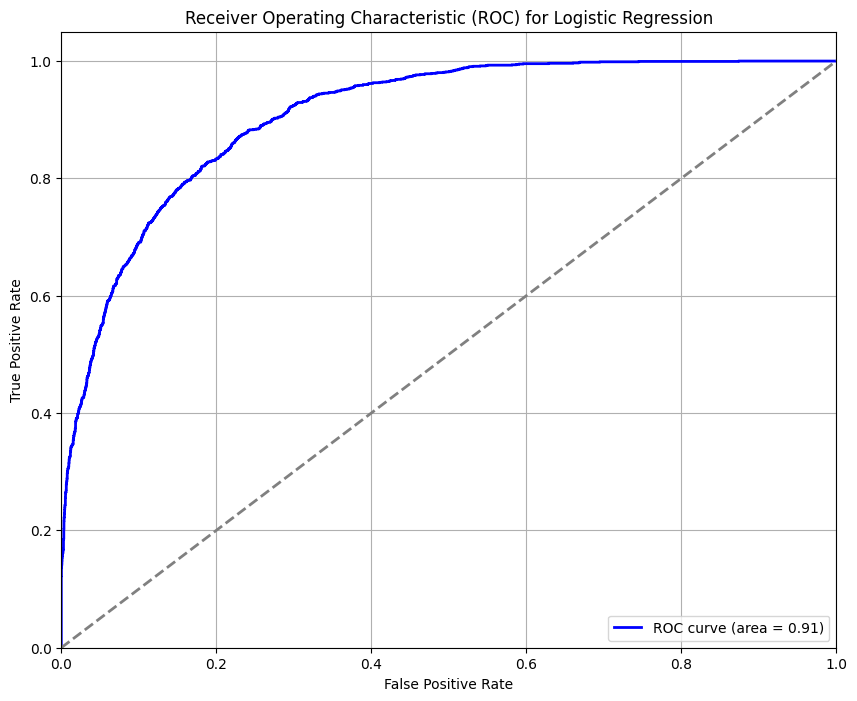

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
#y_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log_reg)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [60]:
from sklearn.tree import DecisionTreeClassifier

def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth,
    min_samples_leaf = leaf)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

accuracy_list = []
max_depth_range = [8,32]
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    accuracy_list.append(float(score))

Max Depth=8, accuracy score: 0.8572086596038692
Max Depth=32, accuracy score: 0.8218946721940734


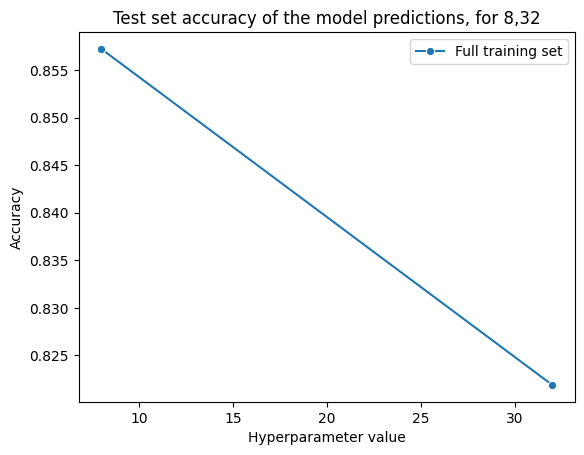

In [61]:
def visualize_accuracy(hyperparam_range, acc):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = sns.lineplot(x=hyperparam_range, y=acc, marker='o', label = 'Full training set')
    plt.title('Test set accuracy of the model predictions, for ' + ','. join([str(h) for h in hyperparam_range]))
    ax.set_xlabel('Hyperparameter value')
    ax.set_ylabel('Accuracy')
    plt.show()

visualize_accuracy(max_depth_range, accuracy_list)


Max Depth=1, accuracy score: 0.7587901120835252
Max Depth=2, accuracy score: 0.828036235221864
Max Depth=4, accuracy score: 0.8452326116996776
Max Depth=8, accuracy score: 0.8569015814524796
Max Depth=16, accuracy score: 0.8476892369107938
Max Depth=32, accuracy score: 0.8218946721940734


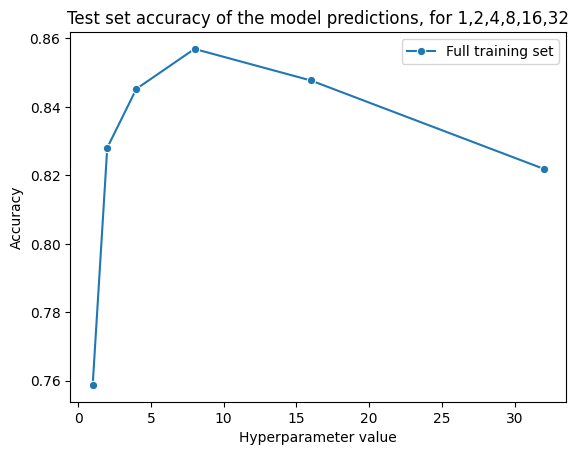

In [62]:
accuracy_list = []
max_depth_range = [2**i for i in range(6)]
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    accuracy_list.append(float(score))
visualize_accuracy(max_depth_range, accuracy_list)

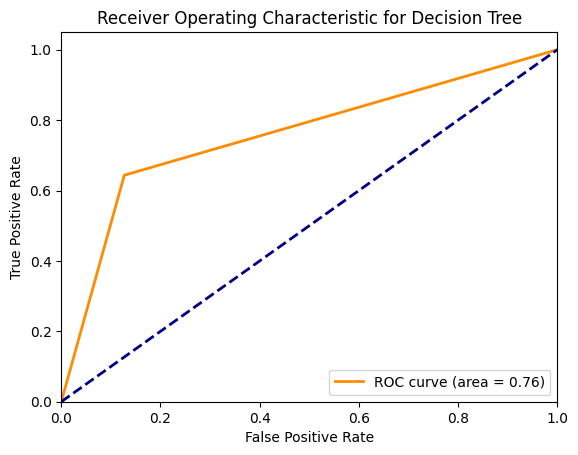

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)  

# Predict probabilities
y_prob = dt.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Computing AUC
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Define Gradient Boosting model
gb = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Reduced number of options
    'learning_rate': [0.01, 0.1],  # Reduced number of options
    'max_depth': [3, 5],  # Reduced number of options
    'subsample': [0.8, 0.9]  # Reduced number of options
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)  # Reduced cv to 3

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)  # Ensure X_train_scaled is used

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Best model
best_gb = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_gb.predict(X_test_scaled)
y_prob = best_gb.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Best Gradient Boosting Model:")
print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {auc}")





Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Best Gradient Boosting Model:
Accuracy: 0.876861661292799
AUC-ROC: 0.9284426270260162


In [32]:

# Train the model with the best parameters
best_gb = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.9
)
best_gb.fit(X_train_scaled, y_train)



GradientBoostingClassifier(max_depth=5, subsample=0.9)

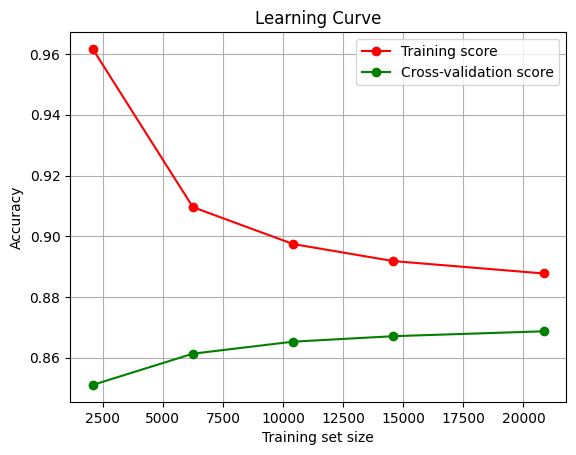

In [67]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_gb, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0]
)

# Calculate mean and standard deviation
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


The drastic decrease in the training score along with a small, steady increase in the cross-validation score suggests that the model is shifting from initial overfitting to more effective generalization. Even though the training data is less accurate, the model's overall performance on new, unseen data is progressing.